<a href="https://colab.research.google.com/github/pranjal2234/Car-price-evaluation/blob/main/Car_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing files
import pandas as pd 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
car_data = pd.read_csv("/content/drive/MyDrive/Data/car_evaluation.csv")
car_data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
car_data.columns = ["buying", "maintain", "doors", "persons", "luggage", "safety", "rating" ]

In [ ]:
car_data.isnull().sum()

buying      0
maintain    0
doors       0
persons     0
luggage     0
safety      0
rating      0
dtype: int64

In [ ]:
from sklearn import preprocessing
encod = preprocessing.LabelEncoder()

In [ ]:
car_data['buying'] = encod.fit_transform(car_data['buying'])
car_data['maintain'] = encod.fit_transform(car_data['maintain'])
car_data['doors'] = encod.fit_transform(car_data['doors'])
car_data['persons'] = encod.fit_transform(car_data['persons'])
car_data['luggage'] = encod.fit_transform(car_data['luggage'])
car_data['safety'] = encod.fit_transform(car_data['safety'])
car_data['rating'] = encod.fit_transform(car_data['rating'])

In [ ]:
car_data.head()

,buying,maintain,doors,persons,luggage,safety,rating
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


In [ ]:
 car_data.describe()

,buying,maintain,doors,persons,luggage,safety,rating
count,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.00000,1727.000000
mean,1.499131,1.499131,1.500869,1.000579,0.999421,1.00000,1.552982
std,1.118098,1.118098,1.118098,0.816615,0.816615,0.81697,0.876136
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.500000,0.500000,1.000000,0.000000,0.000000,0.00000,1.000000
50%,1.000000,1.000000,2.000000,1.000000,1.000000,1.00000,2.000000
75%,2.000000,2.000000,2.500000,2.000000,2.000000,2.00000,2.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.00000,3.000000


In [ ]:
features = ["buying", "maintain", "doors", "persons","luggage", "safety"]
train_data = car_data.iloc[:1400]
test_data = car_data.iloc[1400:] 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

scores = {}
scores_list = []

for k in range(1,21):
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(train_data[features], train_data["rating"] )
  predictions= classifier.predict(test_data[features])
  scores[k] = metrics.accuracy_score(test_data["rating"], predictions)
  scores_list.append(metrics.accuracy_score(test_data["rating"], predictions))

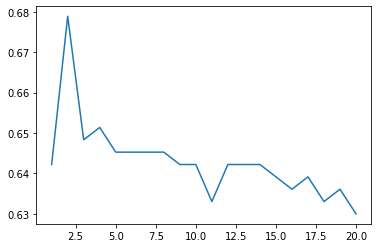

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(1,21), scores_list)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(train_data[features], train_data["rating"] )

KNeighborsClassifier(n_neighbors=2)

In [ ]:
predictions= classifier.predict(test_data[features])
predictions

array([2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2,
       0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(test_data["rating"], predictions))
print(metrics.f1_score(test_data["rating"], predictions, average='weighted'))

0.6788990825688074
0.6101150281749174
